# Data Science In Python - Assignment 1

Name:                  - Daniel Lenehan
Student number:        - 15499152
    
Dataset link:          - https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD

In [3]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime
import seaborn
%matplotlib inline

In [4]:
# Ensure the file exists
if not os.path.exists( "cleanedCrimeFile.csv" ):
    print("Missing dataset file")

In [5]:
df_full = pd.read_csv( "cleanedCrimeFile.csv" )

The line below just gets rid of the index column that was added when formatting the cleaned crime file as a CSV. 

In [6]:
df_full.columns = df_full.columns.str.replace('\s+', '_')
df_full.drop('Unnamed:_0', axis=1, inplace=True)

Looking at the cleaned file we can see there are 20 fields and no null values. 

In [7]:
df_full.head(5)

,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,Year,Updated_On,Latitude,Longitude,Location
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,1111,11,28,25,04B,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,725,7,15,67,26,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,222,2,4,39,08B,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,225,2,3,40,08B,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,1113,11,28,25,03,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"


The line below gets a list of the Top 10 crimes that have been reported most often. 

In [8]:
top10List = df_full["Primary_Type"].value_counts().head(10).index.tolist()
top10Counts = df_full["Primary_Type"].value_counts().head(10)

The following block of code created a bar chart for the Top 10 crimes that have occured the most. 

([<matplotlib.axis.XTick at 0x1f315fc38d0>,
 <a list of 10 Text xticklabel objects>)

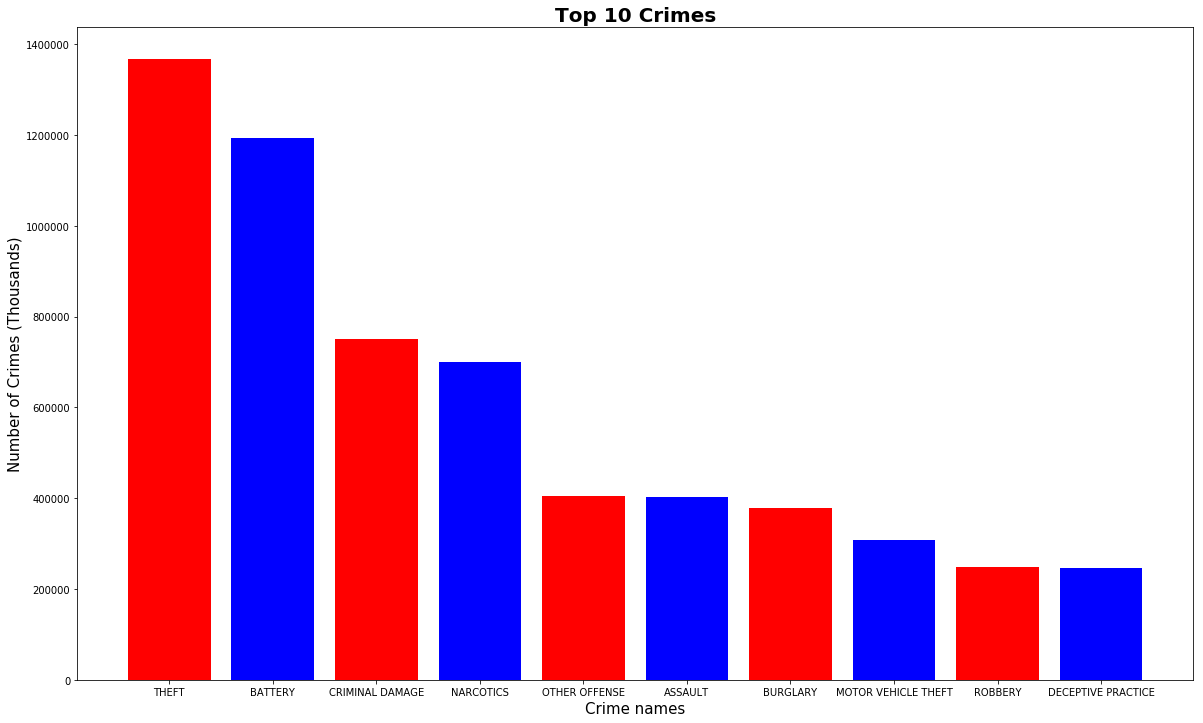

In [93]:
# This x variable dictates the amount of bars there will be
x = np.arange(10)
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
ax.set_title('Top 10 Crimes', fontsize=20, fontweight='bold')
ax.set_xlabel('Crime names', fontsize=15)
ax.set_ylabel('Number of Crimes (Thousands)', fontsize=15)
# The x axis of the chart is the head of the value count function on the full database. 
# Which will get the occurance of each unique value in the primary type column 
plt.bar(x, top10Counts , color=['red', 'blue'])
# the labels are the list of the top ten crimes from above
plt.xticks(x, top10List)

This bar chart is showing the top 10 most occuring crimes. As we can see theft is clearly the biggest offender across the years.

This line below gets the number of accounts of an arrest for the top 5 crimes.

In [10]:
#This first line creates a list of the Top 5 crimes in alphabetical order
top5List = df_full["Primary_Type"].value_counts().head(5).sort_index().index.tolist()

# This lines gets all the rows for the top 5 crimes that have successful arrests
top5Arrests = df_full.loc[(df_full['Primary_Type'].isin([top5List[0], top5List[1], top5List[2], top5List[3], top5List[4]])) & df_full['Arrest'] == True]
# This lines gets all the rows for the top 5 crimes that have no arrests made
top5fails = df_full.loc[(df_full['Arrest'] == False) & df_full['Primary_Type'].isin([top5List[0], top5List[1], top5List[2], top5List[3], top5List[4]])]

#These next two lines get the number of arrests and non arrests for the top 5 crimes and orders the counts by the crime name
Arr = top5Arrests["Primary_Type"].value_counts().sort_index()
noArr = top5fails["Primary_Type"].value_counts().sort_index()
#This shows the order the crimes and there counts will be in for the visualisation below
top5List

['BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'OTHER OFFENSE', 'THEFT']

In [11]:
# The two dfs i have created here have been put in the same order (of crime name not count)
# This was so the two bar would be correctly put beside each other. 
print("Arrests: \n", Arr)
print("\n\n")
print("No Arrests: \n", noArr)

Arrests: 
 BATTERY            272944
CRIMINAL DAMAGE     53142
NARCOTICS          696674
OTHER OFFENSE       71893
THEFT              164610
Name: Primary_Type, dtype: int64



No Arrests: 
 BATTERY             920985
CRIMINAL DAMAGE     696820
NARCOTICS             4223
OTHER OFFENSE       333656
THEFT              1204028
Name: Primary_Type, dtype: int64


[Text(0,0,'BATTERY'),
 Text(0,0,'CRIMINAL DAMAGE'),
 Text(0,0,'NARCOTICS'),
 Text(0,0,'OTHER OFFENSE'),
 Text(0,0,'THEFT')]

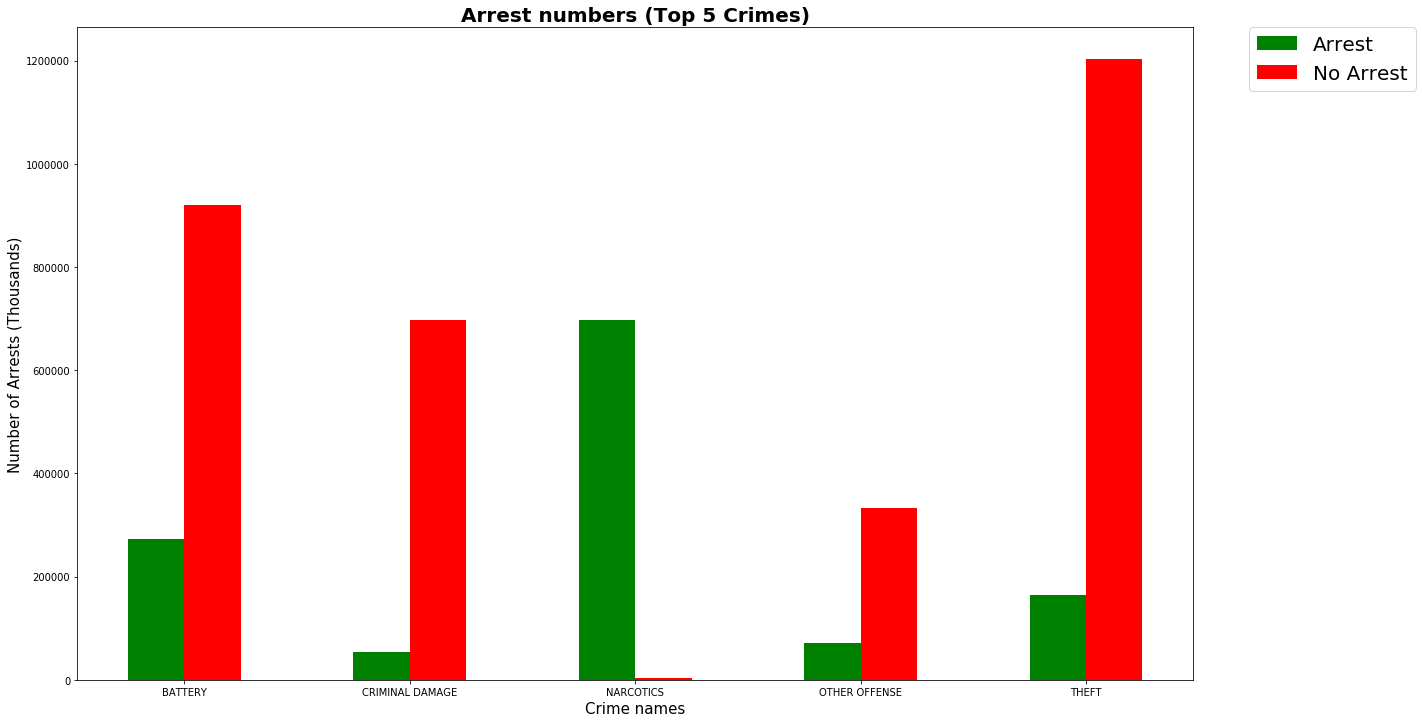

In [95]:
# the width of bars 
width = 0.25  

# The number of bars 
ind = np.arange(5)
fig, ax = plt.subplots()

# size of the graph
fig.set_size_inches(20,12)
ax.set_title('Arrest numbers (Top 5 Crimes)', fontsize=20, fontweight='bold')
ax.set_xlabel('Crime names', fontsize=15)
ax.set_ylabel('Number of Arrests (Thousands)', fontsize=15)

# the true and false bars 
true = ax.bar(ind, Arr, width, color='g')
false = ax.bar(ind + 0.25, noArr, width, color='r')

# creating the lengend and titles
ax.legend((true[0], false[0]), ('Arrest', 'No Arrest'), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 20})
ax.set_xticks(ind + width/2)
ax.set_xticklabels(top5List)

This bar chart takes the top 5 most occuring crimes and compares the numbers of arrests to no arrests when these crimes occur. 
Interestingly theft is the most re-occuring crime but quite suprisingly there are little arrests made when a theft crime is reported compared to arrests made. Contrastingly when we look at narcotics there is almost always an arrest made.  

Here we can see the number of crimes per each year. 2018 is unfinished data as the year has just begun. 

In [13]:
df_full["Year"].value_counts()

2002    486728
2001    485716
2003    475892
2004    469358
2005    453684
2006    448058
2007    436956
2008    426982
2009    392600
2010    370222
2011    351664
2012    335813
2013    306864
2014    274900
2016    268316
2017    266266
2015    263580
2018     28982
Name: Year, dtype: int64

In [14]:
# Seeing as 2018 is incomplete there is no reason to use it in the following visualisation. 
no2018 = df_full[df_full['Year'] != 2018].copy()
no2018["Year"].unique()

array([2015, 2014, 2002, 2008, 2006, 2004, 2001, 2005, 2017, 2016, 2009,
       2012, 2013, 2003, 2011, 2007, 2010], dtype=int64)

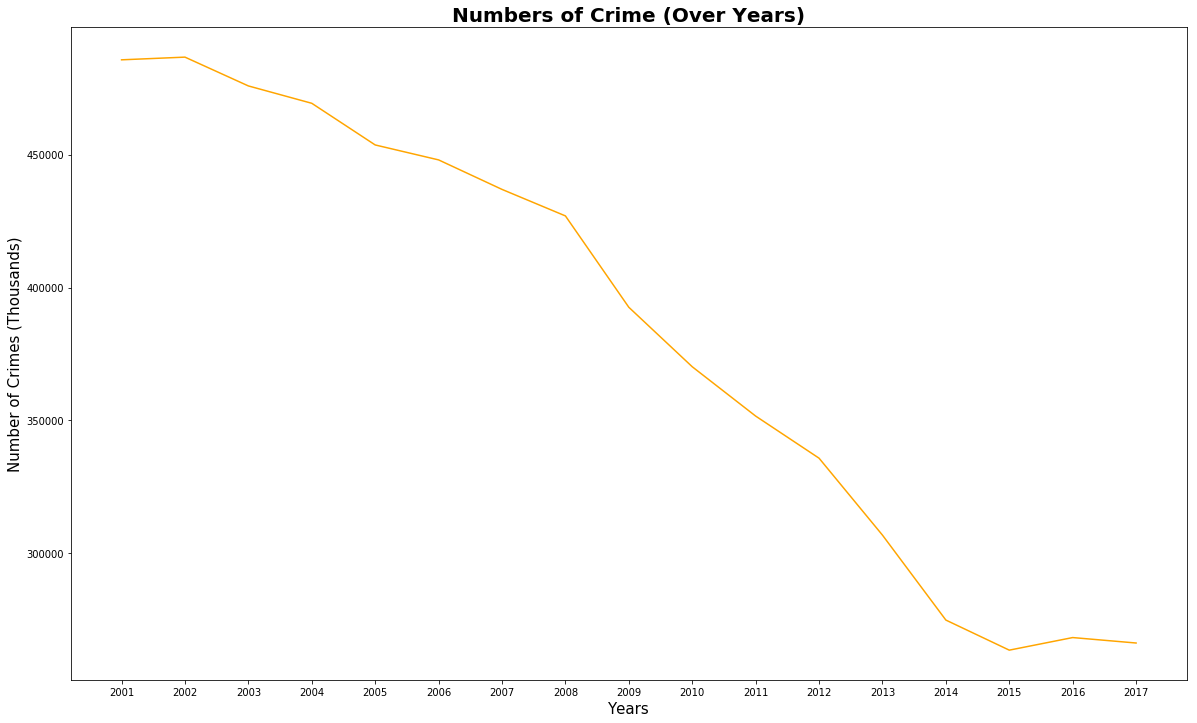

In [96]:
# This is the list of the years for the xtick labels
yearList = no2018["Year"].value_counts().sort_index().index.tolist()

# There are 17 years being compared
ind = np.arange(17)
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
ax.set_title('Numbers of Crime (Over Years)', fontsize=20, fontweight='bold')
ax.set_xlabel('Years', fontsize=15)
ax.set_ylabel('Number of Crimes (Thousands)', fontsize=15)

#Here we are plotting a line graph of the years against the number of crimes for each year from oldest to newest year
ax.plot(ind, no2018["Year"].value_counts().sort_index(), color='orange')
ax.set_xticklabels(yearList)
ax.set_xticks(ind)

This bar chart is showing the number of crimes across the years of the dataset. As we can see there is a huge consistent drop in 
the number of crimes from the beginning of the dataset (2001) to the end of the dataset (2017) 

This next cell splits up the data of the date field in order to get the occurances of the day in hours be it AM or PM. 

In [16]:
# I only used 2017 in this example because it takes over 20 minutes to gather the information for all years on my machine. 
df1 = df_full[df_full['Year'] == 2017].copy()
# I created two lists to hold the times of day, one for am and pm
amList =[]
pmList =[]

for x in range(len(df1)):
    #This line splits the date of each row by the space character
    #The 4th position of the array is pm or am and the 3rd position of the array is the time. 
    temp = str(df1.iloc[[x]]["Date"]).split()
    if(temp[3] == "PM"):
        pmList.append(temp[2].split(':')[0])
    else:
        amList.append(temp[2].split(':')[0])

In [17]:
# I created to dataframes out of the lists so I could get the number of occurances of each 7 in am and pm. 
pmF = pd.DataFrame({'Times':pmList, })
amF = pd.DataFrame({'Times':amList, })

In [18]:
pmF["Times"].value_counts().sort_index()

01    13116
02    13706
03    14588
04    14390
05    14795
06    15627
07    15270
08    14243
09    13280
10    12900
11    10892
12    16318
Name: Times, dtype: int64

In [19]:
amF["Times"].value_counts().sort_index()

01     7869
02     6861
03     5516
04     4432
05     3864
06     4701
07     6560
08     9394
09    12024
10    11750
11    12242
12    11928
Name: Times, dtype: int64

In [20]:
#This is the list of hours for the xtick labels for the graph below. 
timeList = sorted(pmF["Times"].unique())

[Text(0,0,'01'),
 Text(0,0,'02'),
 Text(0,0,'03'),
 Text(0,0,'04'),
 Text(0,0,'05'),
 Text(0,0,'06'),
 Text(0,0,'07'),
 Text(0,0,'08'),
 Text(0,0,'09'),
 Text(0,0,'10'),
 Text(0,0,'11'),
 Text(0,0,'12')]

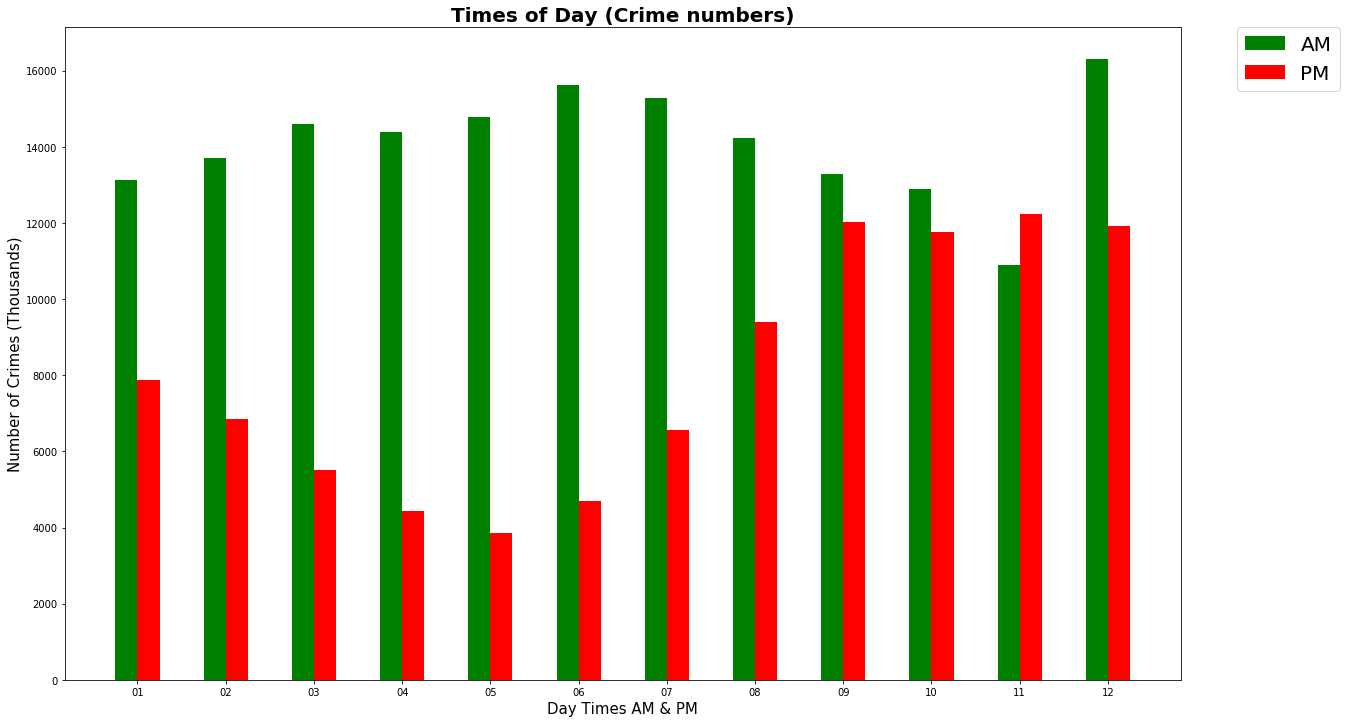

In [98]:
# the width of bars 
width = 0.25  

# The number of bars
ind = np.arange(12)
fig, ax = plt.subplots()

# size of the graph
fig.set_size_inches(20,12)
ax.set_title('Times of Day (Crime numbers)', fontsize=20, fontweight='bold')
ax.set_xlabel('Day Times AM & PM', fontsize=15)
ax.set_ylabel('Number of Crimes (Thousands)', fontsize=15)

# the am and pm bars 
# the number of occurance of the times of day are counted and sorted by the hour (ascending i.e. 1 -> 12)
am = ax.bar(ind, pmF["Times"].value_counts().sort_index(), width, color='g')
pm = ax.bar(ind + 0.25, amF["Times"].value_counts().sort_index(), width, color='r')

# creating the lengend and titles
ax.legend((am[0], pm[0]), ('AM', 'PM'), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 20})
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(timeList)

This is one of my favourite bar charts. It shows the number of crimes at the different times of day (1-12) both AM and PM. At
first glance we can see there are always more arrests in the AM in compared to the PM. Crime also seems to peak around 12am in
the afternoon. In general though this chart shows that crime usally occurs later on in the day and early morning. 

In [22]:
# I only used 2017 in this example because it takes over 20 minutes to gather the information for all years on my machine. 
df_day = df_full[df_full['Year'] == 2017].copy()

# I created a list to hold all the days
dayList = []
#This list is for the month data Vis
monthList = []

for x in range(len(df_day)):
    #This line splits the date of each row by the space character
    #The 4th position of the array is pm or am and the 3rd position of the array is the time. 
    temp = str(df_day.iloc[[x]]["Date"]).split()
    
    #This line splits the date by the '/' character 
    date = temp[1].split('/')
    month = date[0]
    # the if condtion here just gets rid of the zero in the month if there is one
    if(month[0] == '0'):
        # replaces the 0 with nothing
        month = month[1]
        month = int(date[0])
        day = int(date[1])
        year = int(date[2])
    else:
        month = int(date[0])
        day = int(date[1])
        year = int(date[2])
        
    # converts the date to a day of the week in number form (0-6) 0 is Mon and 6 is Sun and adds the day to the created List
    ans = datetime.date(year, month, day)
    monthList.append(month)
    dayList.append(ans.weekday())
    

In [23]:
# Now i change the daysList into a dataframe for valuecounts. 
dayDF = pd.DataFrame({'Days':dayList, })
monthDF = pd.DataFrame({'Months':monthList, })
# Because the day form is in numbers I need a list of day names for the xtick labels. 
dayNameList = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
# I also created a list for the month graphs xtick labels
monthNameList = ["Jan", "Feb", "March", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]

In [24]:
dayDF.head(10)

,Days
0,3
1,6
2,2
3,3
4,1
5,0
6,1
7,4
8,6
9,6


In [25]:
# These are the number of crimes on each day 0 being monday nad 6 being sunday
dayDF["Days"].value_counts().sort_index()

0    37979
1    37505
2    37242
3    37376
4    39762
5    38410
6    37992
Name: Days, dtype: int64

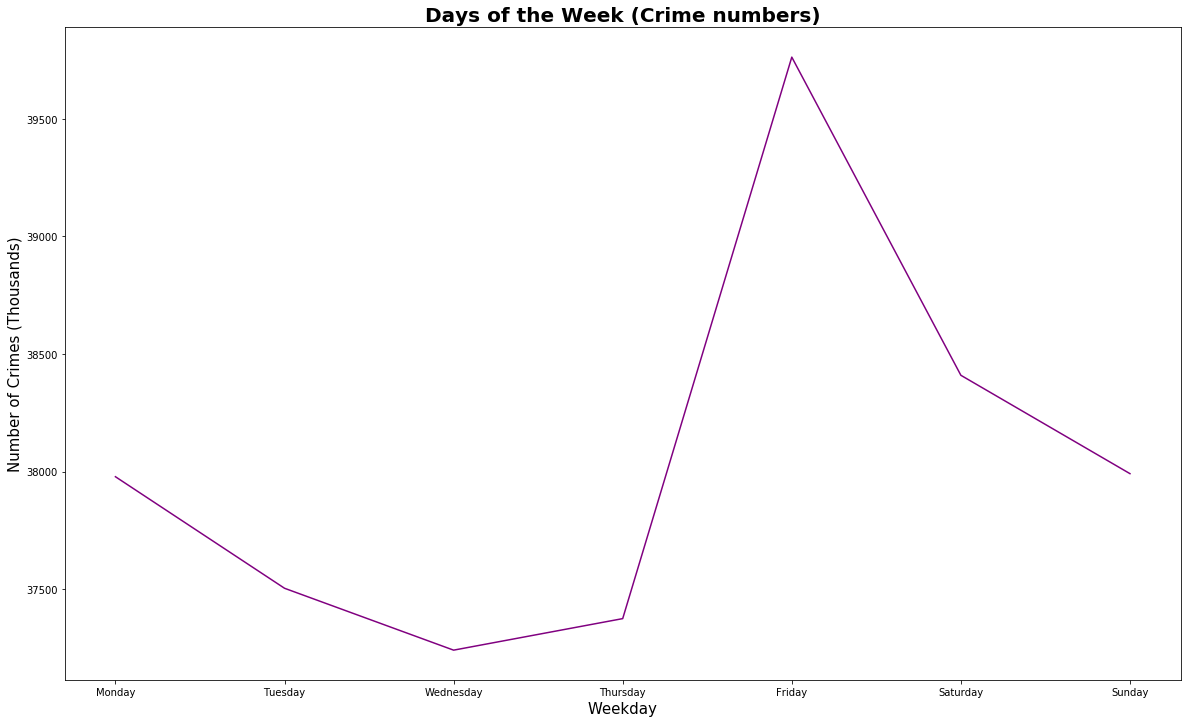

In [108]:
# I only used 2017 in this example because it takes too long to load all the data on my machine however I would expect similar results.
# There are 7 days being compared
ind = np.arange(7)
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
ax.set_title('Days of the Week (Crime numbers)', fontsize=20, fontweight='bold')
ax.set_xlabel('Weekday', fontsize=15)
ax.set_ylabel('Number of Crimes (Thousands)', fontsize=15)

# The line graph plots the number of crimes over the different days of the week. 
ax.plot(ind, dayDF["Days"].value_counts().sort_index(), color='purple')
ax.set_xticklabels(dayNameList)
ax.set_xticks(ind)

This is a cool simple visualisation showing the number of crimes over the different days of the week. Right away we can see crime 
increases quite drastically just before the weekend and falls off quickly late to the end of the weekend. 

In [27]:
# These are the number of crimes on each month
monthDF["Months"].value_counts().sort_index()

1     21892
2     19171
3     20425
4     21537
5     23236
6     23661
7     24689
8     24547
9     22633
10    22624
11    21187
12    20664
Name: Months, dtype: int64

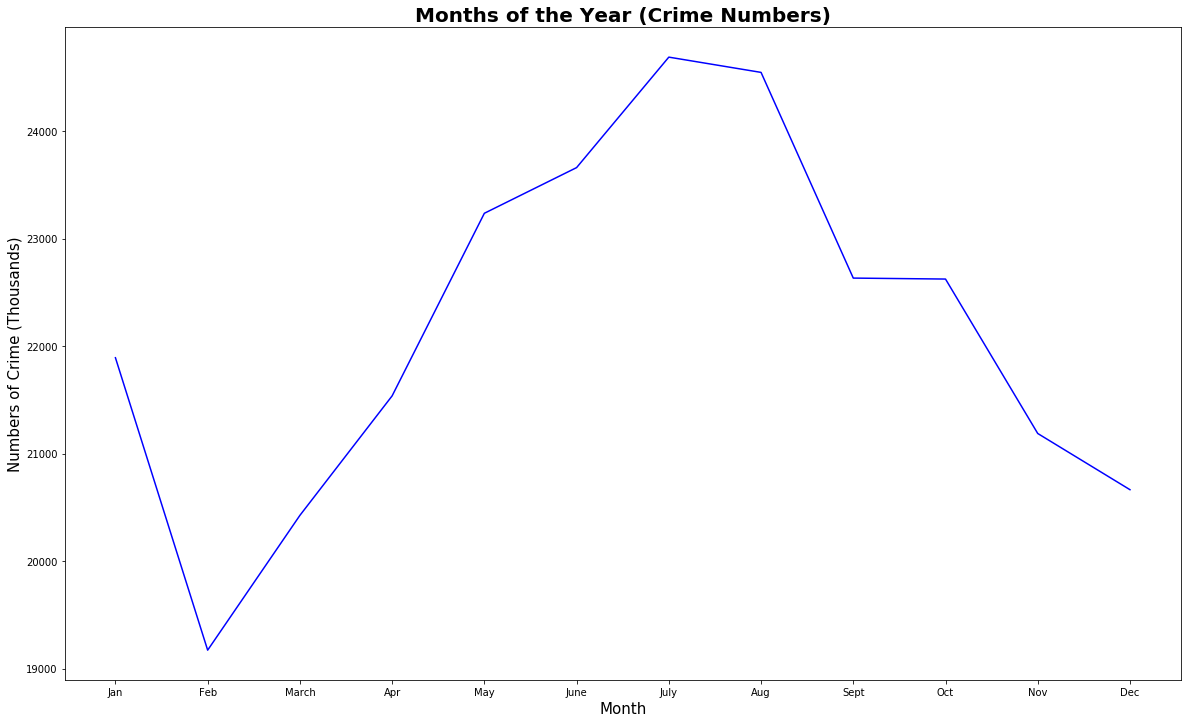

In [101]:
# I only used 2017 in this example because it takes too long to load all the data on my machine however I would expect similar results.
# There are 12 months being compared
ind = np.arange(12)
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
ax.set_title('Months of the Year (Crime Numbers)', fontsize=20, fontweight='bold')
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Numbers of Crime (Thousands)', fontsize=15)

#Here we are plotting a line graph showing the difference in crime numbers over the various months. 
ax.plot(ind, monthDF["Months"].value_counts().sort_index(), color='blue')
ax.set_xticklabels(monthNameList)
ax.set_xticks(ind)

This line graph shows what months have the most crimes reported. As we can see most of the crime occurs at the end of winter and 
continues to rise and stay level through spring and summer before falling off again during autumn and winter. 

In [29]:
# Number of crimes by each district 
disList = df_full["District"].value_counts().sort_index().index.tolist()
df_full["District"].value_counts().sort_index()

0        197
1     247147
2     315853
3     333688
4     371685
5     289845
6     376039
7     387680
8     446589
9     325966
10    278825
11    416891
12    320331
14    259065
15    286813
16    216753
17    189911
18    284385
19    291405
20    113871
22    214692
24    195329
25    379621
Name: District, dtype: int64

In [30]:
# This are all the crimes that have arrests 
arrestDF = df_full[df_full['Arrest'] == True]

In [31]:
# All the districts with the number of arrests
arrestDF["District"].value_counts().sort_index()

0         73
1      73631
2      91189
3      91912
4      87669
5      76582
6     102437
7     113132
8     108149
9      96430
10     91440
11    182338
12     80481
14     56153
15    121605
16     42588
17     42644
18     72459
19     67243
20     28630
22     47384
24     47079
25    109322
Name: District, dtype: int64

In [32]:
df_full["Arrest"].value_counts().sort_index()

False    4712011
True     1830570
Name: Arrest, dtype: int64

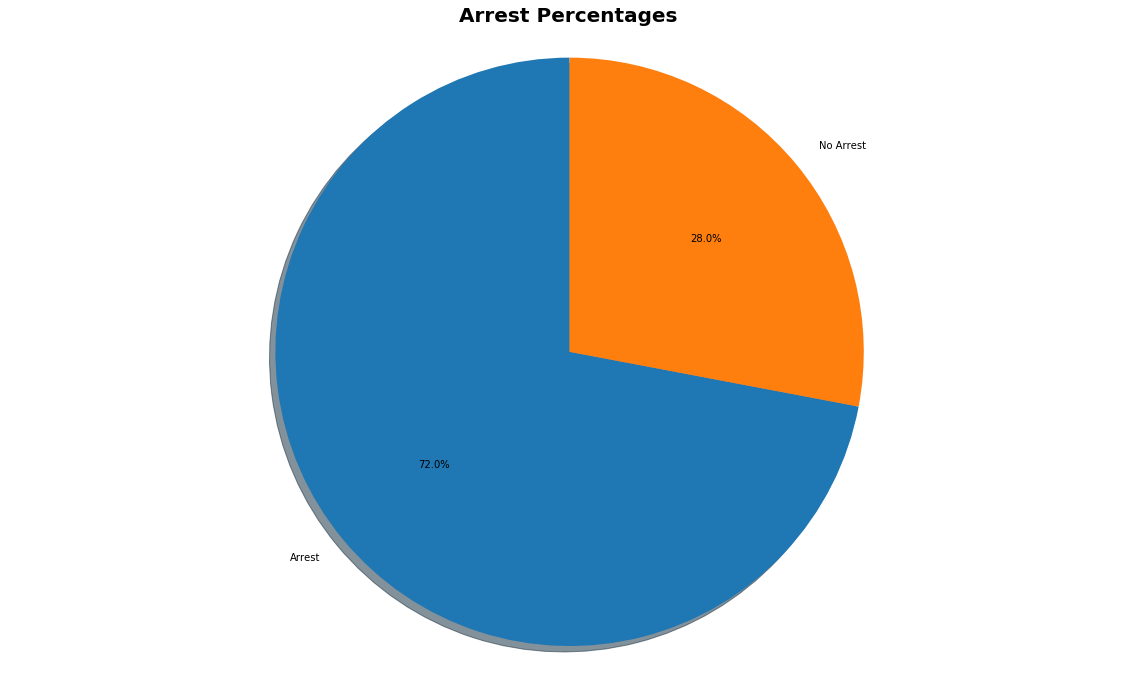

In [104]:
#Simple graph looking at all crimes and the percentage that had arrests to no arrests
fig1, ax1 = plt.subplots()
fig1.set_size_inches(20, 12)
ax1.pie(df_full["Arrest"].value_counts().sort_index(), labels=["Arrest", "No Arrest"], autopct='%1.1f%%',shadow=True, startangle=90)
ax1.set_title('Arrest Percentages', fontsize=20, fontweight='bold')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

This is a really quick and simple pie chart that gives an incredible insight to arrests and crime in Chicago. Here we can see 
that nearly 75% of the time a crime is committed no arrest is made and only 28% of the time an arrest is made. 

In [34]:
df_full.head(5)

,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,Year,Updated_On,Latitude,Longitude,Location
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,1111,11,28,25,04B,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,725,7,15,67,26,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,222,2,4,39,08B,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,225,2,3,40,08B,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,1113,11,28,25,03,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"


In [47]:
ylist = df_full["District"].value_counts().sort_index().tolist()
xlist = arrestDF["District"].value_counts().sort_index().tolist()

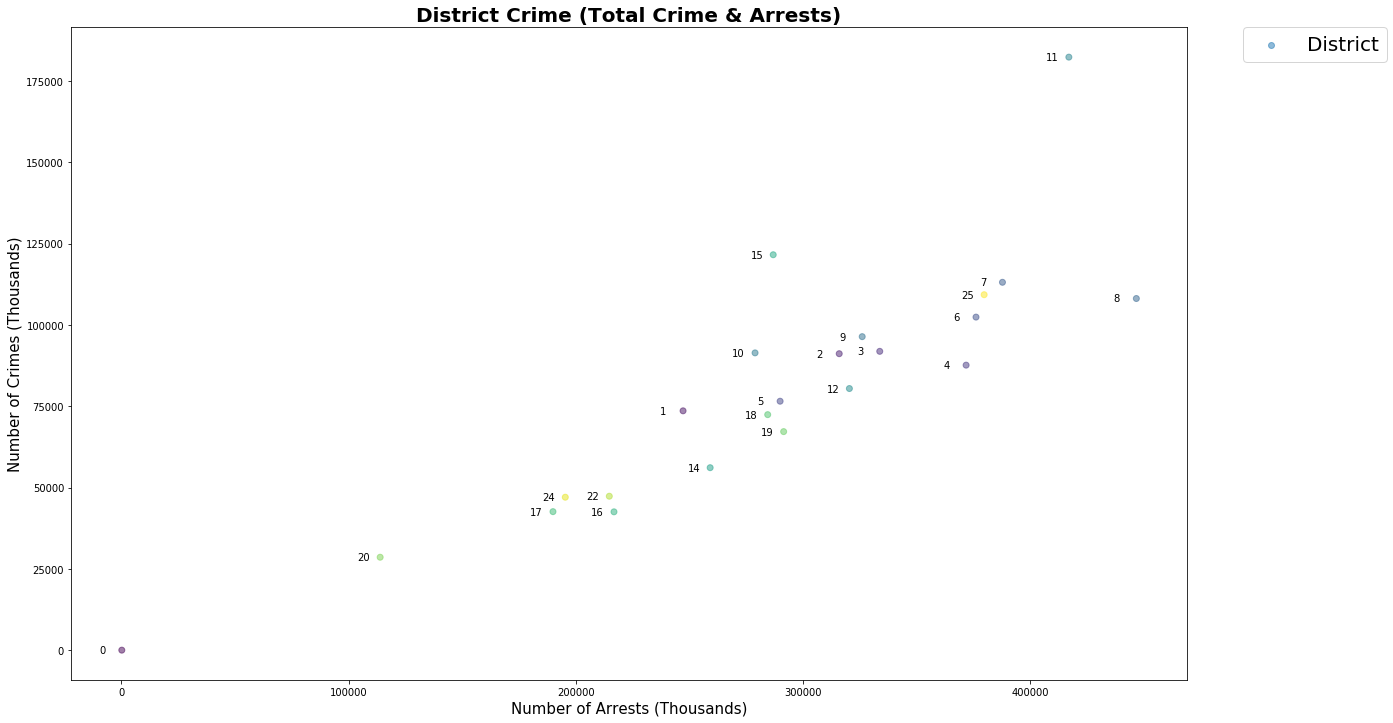

In [107]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
ax.set_title('District Crime (Total Crime & Arrests)', fontsize=20, fontweight='bold')
ax.set_xlabel('Number of Arrests (Thousands)', fontsize=15)
ax.set_ylabel('Number of Crimes (Thousands)', fontsize=15)
color = [str(item/255.) for item in disList]
# This for loop put the district number beside its point on the plot
for i, txt in enumerate(disList):
    ax.annotate(txt, (ylist[i]-10000,xlist[i]-1000))
# The x-axis is the number of arrests and the y-axis the total number of crimes 
ax.scatter(df_full["District"].value_counts().sort_index(), arrestDF["District"].value_counts().sort_index(),c=color,alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 20})

This graph shows the number of crimes and arrests across all the districts of chicago. First off like in our previous graphs
we can see there is a huge difference in the numbers of crimes and actual arrests. Also we can see that district 11 has much
higher crime and arrests made then all the other. 
Whereas district 0 is very low. This is because this district doesn't exist. The crimes under this district were enter into the 
dataset without a district. 

In [37]:
disList

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 22,
 24,
 25]

# <> Further Analysis <>

* One area I would have like to analyse more is the location of the various crimes. In my data cleaning I got rid of and added values for the longitude and latitude fields of the dataset. So If I could create a map visualisation of chicago I could plot all the values for lat and long and see exactly where all the the crime is located on an actual map. 

* Other than that I would like to explore different types of graphs and visualisations which I will do in my next project. 